# Computer Vision Fundamentals: OpenCV with Python

OpenCV (Open Source Computer Vision) is a library of programming functions mainly aimed at real-time computer vision. OpenCV is written in C++, but there are bindings in Python, Java and Matlab. So, here we will perform some basic digital image processing operations using OpenCV as a Python module.   

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Dealing with images...

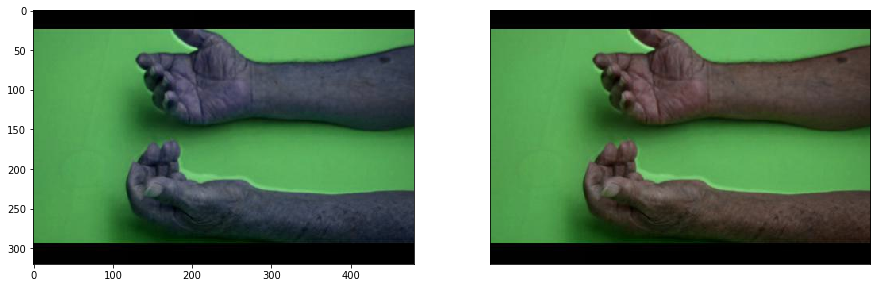

In [2]:
I = cv.imread("frames/handtremor_magnified/1.jpg",1)

plt.figure(figsize=(15,20))
plt.subplot(121), plt.imshow(I) # <=============== BGR
plt.subplot(122), plt.imshow(I[...,::-1]) # <===== RGB 
plt.xticks([]), plt.yticks([]);

In [4]:
print(I.shape)
I[54,469]

(320L, 480L, 3L)


array([48, 55, 72], dtype=uint8)

(320L, 480L)
float64
uint8


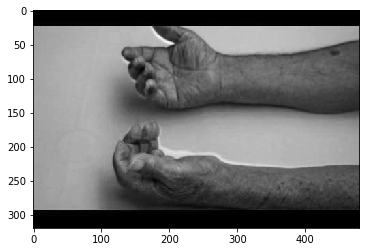

In [5]:
Ig = 0.2989*I[:,:,2] + 0.5870*I[:,:,1] + 0.1140*I[:,:,0]
print(Ig.shape)
print(Ig.dtype)
Ig = Ig.astype(np.uint8)
print(Ig.dtype)

plt.imshow(Ig, cmap='gray')
cv.imwrite('../imgs/handtremor_magnified_1.jpg',Ig);

## Dealing with videos...

Now, read the next video and store its frames:

<img src="video.gif">

609.0
1.0


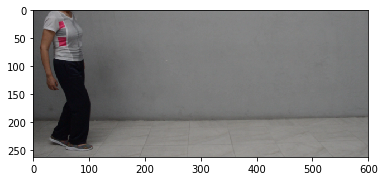

In [6]:
path = "../videos/gait.avi"
V = cv.VideoCapture(path)
ret,f = V.read()
plt.imshow(f[...,::-1])

print(V.get(cv.CAP_PROP_FRAME_COUNT))

print(V.get(cv.CAP_PROP_POS_FRAMES))

In [7]:
def create_directory(path):
    import os
    # define the name of the directory to be created
    gait_frames_path = path
    try:
        os.makedirs(gait_frames_path)
        print("=========================================================")
        print("The folder "+gait_frames_path+" was created sucessfully!")
        print("=========================================================")
    except Exception as e:
        print("=========================================================")
        print("There was an error creating the folder "+gait_frames_path+"\n message: "+str(e))
        print("=========================================================")
        

In [8]:
gait_frames_path = "frames/gait/"
create_directory(gait_frames_path)
V.set(cv.CAP_PROP_POS_FRAMES, 0); 
ret,f = V.read()
counter = 0
while ret:
    counter += 1
    fname = gait_frames_path + str(counter)+".jpg"
    cv.imwrite(fname, f)
    print("Generating frame "+str(counter))
    ret,f = V.read()

The folder frames/gait/ was created sucessfully!
Generating frame 1
Generating frame 2
Generating frame 3
Generating frame 4
Generating frame 5
Generating frame 6
Generating frame 7
Generating frame 8
Generating frame 9
Generating frame 10
Generating frame 11
Generating frame 12
Generating frame 13
Generating frame 14
Generating frame 15
Generating frame 16
Generating frame 17
Generating frame 18
Generating frame 19
Generating frame 20
Generating frame 21
Generating frame 22
Generating frame 23
Generating frame 24
Generating frame 25
Generating frame 26
Generating frame 27
Generating frame 28
Generating frame 29
Generating frame 30
Generating frame 31
Generating frame 32
Generating frame 33
Generating frame 34
Generating frame 35
Generating frame 36
Generating frame 37
Generating frame 38
Generating frame 39
Generating frame 40
Generating frame 41
Generating frame 42
Generating frame 43
Generating frame 44
Generating frame 45
Generating frame 46
Generating frame 47
Generating frame 48


Generating frame 412
Generating frame 413
Generating frame 414
Generating frame 415
Generating frame 416
Generating frame 417
Generating frame 418
Generating frame 419
Generating frame 420
Generating frame 421
Generating frame 422
Generating frame 423
Generating frame 424
Generating frame 425
Generating frame 426
Generating frame 427
Generating frame 428
Generating frame 429
Generating frame 430
Generating frame 431
Generating frame 432
Generating frame 433
Generating frame 434
Generating frame 435
Generating frame 436
Generating frame 437
Generating frame 438
Generating frame 439
Generating frame 440
Generating frame 441
Generating frame 442
Generating frame 443
Generating frame 444
Generating frame 445
Generating frame 446
Generating frame 447
Generating frame 448
Generating frame 449
Generating frame 450
Generating frame 451
Generating frame 452
Generating frame 453
Generating frame 454
Generating frame 455
Generating frame 456
Generating frame 457
Generating frame 458
Generating fr

Inside the frame folder you will find the generated video frames:

<img src="../imgs/frames.png">

## Arithmetic Operations on Images

We can perform arithmetic operations over images. See how to average the frames of this video: 

<img src="../imgs/street.gif">

263.0
600.0
609.0


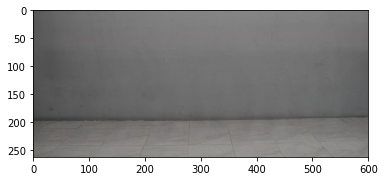

In [9]:
counter = 0
read_numpy_video = True
V = cv.VideoCapture("../videos/gait.avi")

H = V.get(cv.CAP_PROP_FRAME_HEIGHT)
W = V.get(cv.CAP_PROP_FRAME_WIDTH)
frames = V.get(cv.CAP_PROP_FRAME_COUNT)
gait = np.empty((int(H),int(W),3,int(frames)))
print (H)
print (W) 
print (frames)
frameSum = np.zeros(shape=(int(H),int(W),3))

ret,f = V.read()
while ret:
    if(read_numpy_video):
        gait[:,:,:,counter] = f
    counter +=1
    frameSum += f
    ret,f = V.read()

Nf = V.get(cv.CAP_PROP_FRAME_COUNT)
frameAvg = frameSum/Nf
frameAvg = frameAvg.astype(np.uint8)

plt.imshow(frameAvg[...,::-1]);

Then, implement a simple substraction between the average frame and some frame with a car passing by:

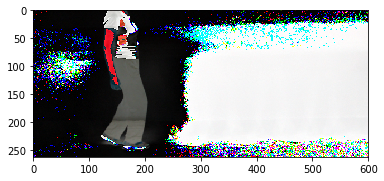

In [10]:
V.set(cv.CAP_PROP_POS_FRAMES, 39)
ret,f = V.read()
plt.imshow((frameAvg - f)[...,::-1]);

Now, make some experiments with Interact tool from Jupyter Widgets.

In [11]:
#conda install -c conda-forge ipywidgets
if(read_numpy_video):
    from ipywidgets import interact, fixed
    import ipywidgets as widgets

    def plot_a_frame(image, frame, RGB = False):
        image = np.array(image,np.int16)
        if (RGB):
            plt.imshow(image[:,:,::-1,frame])
        else:
            plt.imshow(image[:,:,0,frame], cmap = "gray")

    interact(plot_a_frame, frame=widgets.IntSlider(min=0,max=frames-1, step=1,value=10), 
             image = fixed(gait) , RBG = fixed(False))

C:\Users\Camilo\.conda\envs\compability\lib\site-packages\traitlets\traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xMCwgZGVzY3JpcHRpb249dSdmcmFtZScsIG1heD02MDgpLCBDaGVja2JveCh2YWx1ZT1GYWxzZSwgZGVzY3JpcHRpb249dSfigKY=


In [13]:
if(read_numpy_video):
    def plot_substraction(average_frame, image ,frame, RGB = False):
        average_frame = np.array(average_frame,np.int16)
        image = np.array(image, np.int16)
        if (RGB):
            result = abs(image[:,:,::-1,frame] - average_frame[:,:,::-1])
            plt.imshow( result[...,::-1])
        else:
            result = abs (image[:,:,0,frame] - average_frame[:,:,0])
            plt.imshow( result, cmap='gray')

    interact(plot_substraction, frame=widgets.IntSlider(min=0,max=frames-1, step=1,value=10),
             image = fixed(gait), average_frame= fixed(frameAvg) , RBG = fixed(False))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xMCwgZGVzY3JpcHRpb249dSdmcmFtZScsIG1heD02MDgpLCBDaGVja2JveCh2YWx1ZT1GYWxzZSwgZGVzY3JpcHRpb249dSfigKY=


Free your resources!

In [14]:
if (read_numpy_video):
    del gait

## Image Quantization


[   0.   16.   32.   48.   64.   80.   96.  112.  128.  144.  160.  176.
  192.  208.  224.  240.  256.]
[   0.   32.   64.   96.  128.  160.  192.  224.  256.]
[   0.   64.  128.  192.  256.]


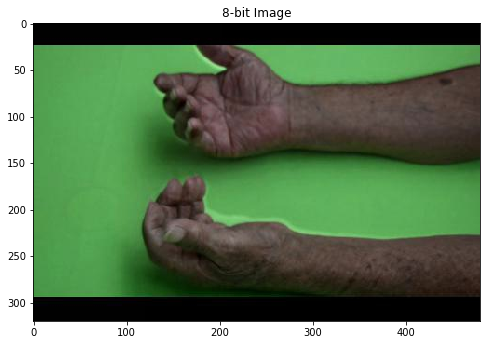

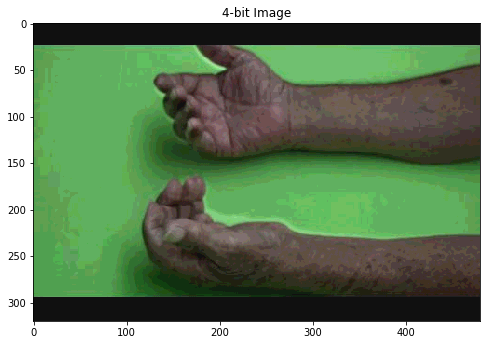

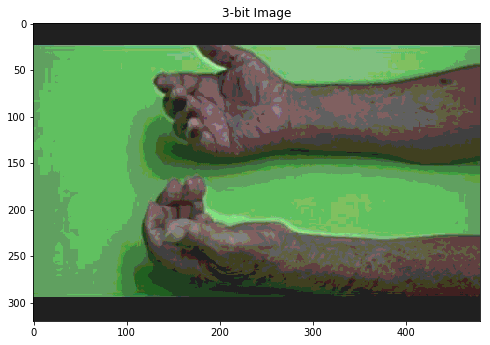

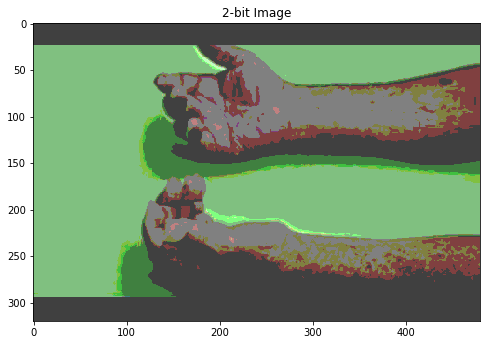

In [15]:
# 8-bit Image
U8 = cv.imread('frames/handtremor_magnified/1.jpg')
plt.figure(figsize=(8,13))
plt.imshow(U8[...,::-1]), plt.title('8-bit Image')

# 4-bit Quantization
bins = np.zeros(shape=(17)) 
for i in range(17):
    bins[i] = i*16
print(bins)    
U4 = np.digitize(U8,bins)
U4 = U4*16
U4[U4==256] = U4[U4==256] - 1
U4 = U4.astype(np.uint8)
plt.figure(figsize=(8,13))
plt.imshow(U4[...,::-1]), plt.title('4-bit Image') 

# 3-bit Quantization
bins = np.zeros(shape=(9)) 
for i in range(9):
    bins[i] = i*32
print(bins)  
U3 = np.digitize(U8,bins)
U3 = U3*32
U3[U3==256] = U3[U3==256] - 1
U3 = U3.astype(np.uint8)
plt.figure(figsize=(8,13))
plt.imshow(U3[...,::-1]), plt.title('3-bit Image') 

# 2-bit Quantization
bins = np.zeros(shape=(5)) 
for i in range(5):
    bins[i] = i*64
print(bins)  
U2 = np.digitize(U8,bins)
U2 = U2*64
U2[U2==256] = U2[U2==256] - 1
U2 = U2.astype(np.uint8)
plt.figure(figsize=(8,13))
plt.imshow(U2[...,::-1]), plt.title('2-bit Image');




## Image Blending

(263L, 480L, 3L)


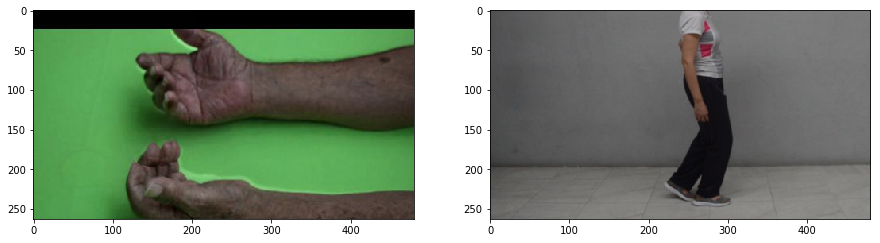

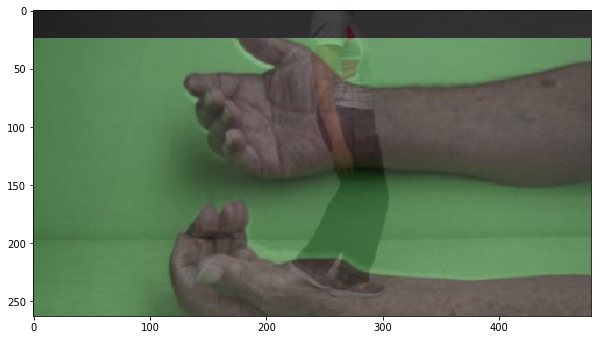

In [16]:
I1 = cv.imread('frames/handtremor_magnified/1.jpg')
I2 = cv.imread('frames/gait/80.jpg')
#Image shapes must be the same!
I1 = I1[:263,:480,:]
I2 = I2[:263,:480,:]

alpha = 0.6
blending = alpha*I1 + (1-alpha)*I2
blending = blending.astype(np.uint8)
print(blending.shape)

cv.imwrite("../imgs/bleding.png", blending)

plt.figure(figsize=(15,20))
plt.subplot(121), plt.imshow(I1[...,::-1])
plt.subplot(122), plt.imshow(I2[...,::-1])

plt.figure(figsize=(10,15))
plt.imshow(blending[...,::-1]);

In [17]:
def image_blending(image1,image2,alpha):
    I1 = image1[:263,:480,:]
    I2 = image2[:263,:480,:]

    blending = alpha*I1 + (1-alpha)*I2
    blending = blending.astype(np.uint8)
    print(blending.shape)

    cv.imwrite("../imgs/bleding.png", blending)

    plt.figure(figsize=(10,15))
    plt.imshow(blending[...,::-1]);
    
interact(image_blending, image1 = fixed(I1), image2 = fixed(I2),
        alpha = (0,1,0.01))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuMCwgZGVzY3JpcHRpb249dSdhbHBoYScsIG1heD0xLjAsIHN0ZXA9MC4wMSksIE91dHB1dCgpKSwgX2RvbV9jbGFzc2XigKY=


<function __main__.image_blending>

## Image Multiplication

(320L, 480L, 3L)


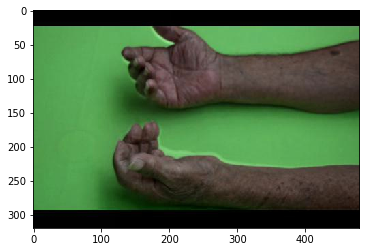

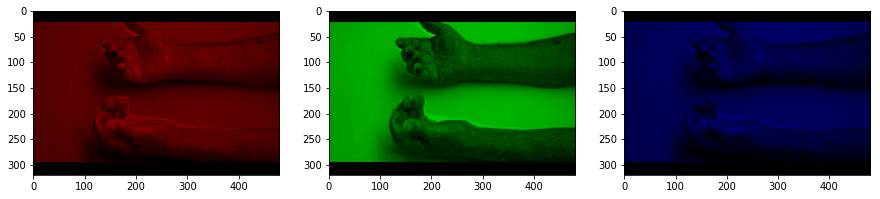

In [18]:
U = cv.imread('frames/handtremor_magnified/1.jpg')
plt.imshow(U[...,::-1]),
print(U.shape)


UR = np.zeros(shape=U.shape,dtype=np.uint8) 
UR[:,:,2] = U[:,:,2]
UG = np.zeros(shape=U.shape,dtype=np.uint8)
UG[:,:,1] = U[:,:,1];
UB = np.zeros(shape=U.shape,dtype=np.uint8)
UB[:,:,0] = U[:,:,0];

plt.figure(figsize=(15,20))
plt.subplot(131), plt.imshow(UR[...,::-1]) 
plt.subplot(132), plt.imshow(UG[...,::-1])
plt.subplot(133), plt.imshow(UB[...,::-1]);

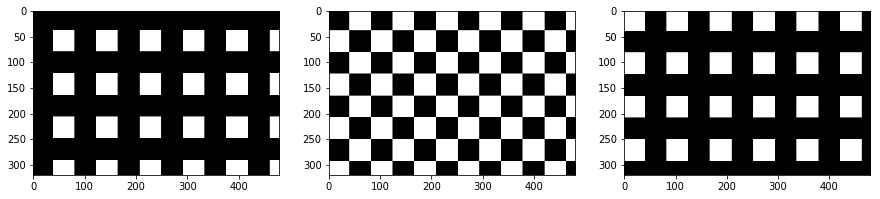

In [19]:
mA = cv.imread('../imgs/mA.png'); mA = mA[:320,:480,0]
mB = cv.imread('../imgs/mB.png'); mB = mB[:320,:480,0]
mC = cv.imread('../imgs/mC.png'); mC = mC[:320,:480,0]

plt.figure(figsize=(15,20))
plt.subplot(131), plt.imshow(mA,cmap='gray') 
plt.subplot(132), plt.imshow(mB,cmap='gray')
plt.subplot(133), plt.imshow(mC,cmap='gray');

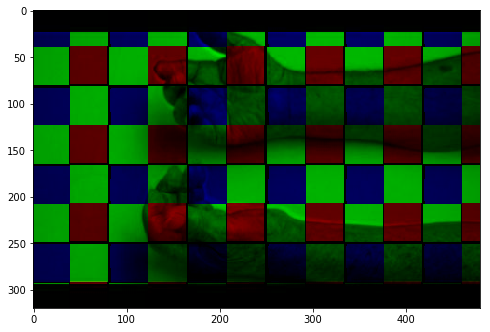

In [20]:
UN = np.zeros(shape=U.shape,dtype=np.uint8)

mA = mA/255
mA = mA.astype(np.uint8)
mB = mB/255
mB = mB.astype(np.uint8)
mC = mC/255
mC = mC.astype(np.uint8)
 
UN[:,:,2] = UR[:,:,2]*mA
UN[:,:,1] = UG[:,:,1]*mB
UN[:,:,0] = UB[:,:,0]*mC

plt.figure(figsize=(8,13))
plt.imshow(UN[...,::-1]);

<img src="../imgs/bannerThanks.jpg" style="width:1000px;">